In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_excel("Data Cabai Kab Malang.xlsx")

In [ ]:
df

,tanggal,Cabe Merah Keriting,Cabe Merah Besar,Cabe Rawit Merah
0,2022-01-01,37000,23600,79000
1,2022-01-02,37000,23200,79000
2,2022-01-03,38000,23200,74000
3,2022-01-04,38000,22000,72000
4,2022-01-05,37200,21600,69000
...,...,...,...,...
725,2023-12-27,65000,65000,76000
726,2023-12-28,61000,68000,71400
727,2023-12-29,61000,67000,71400
728,2023-12-30,61000,67000,71400


In [ ]:
df.set_index('tanggal', inplace=True)

In [ ]:
df

,Cabe Merah Keriting,Cabe Merah Besar,Cabe Rawit Merah
tanggal,,,
2022-01-01,37000,23600,79000
2022-01-02,37000,23200,79000
2022-01-03,38000,23200,74000
2022-01-04,38000,22000,72000
2022-01-05,37200,21600,69000
...,...,...,...
2023-12-27,65000,65000,76000
2023-12-28,61000,68000,71400
2023-12-29,61000,67000,71400


In [ ]:
data2021=pd.read_excel("data tambahan 2021.xlsx")

In [ ]:
data2021

,tanggal,harga
0,2021-01-01,43000
1,2021-01-02,41800
2,2021-01-03,38800
3,2021-01-04,38400
4,2021-01-05,38400
...,...,...
360,2021-12-27,23800
361,2021-12-28,23800
362,2021-12-29,24200
363,2021-12-30,24200


In [ ]:
data2021.set_index('tanggal',inplace=True)

In [ ]:
data2024=pd.read_excel("data tambahan 2024.xlsx")

In [ ]:
data2024.set_index('tanggal',inplace=True)

In [ ]:
data2024

,harga
tanggal,
2024-01-01,63000
2024-01-02,59000
2024-01-03,62400
2024-01-04,64400
2024-01-05,60400
...,...
2024-08-27,30000
2024-08-28,29000
2024-08-29,29000


In [ ]:
dfnew = df[['Cabe Merah Besar']].rename(columns={'Cabe Merah Besar': 'harga'})

In [ ]:
# Gabungkan data_2021 sebelum dfnew
dfnew = pd.concat([data2021, dfnew, data2024])

# Urutkan berdasarkan index (tanggal)
dfnew = dfnew.sort_index()

# Cek hasil setelah penambahan data
print(dfnew)

            harga
tanggal          
2021-01-01  43000
2021-01-02  41800
2021-01-03  38800
2021-01-04  38400
2021-01-05  38400
...           ...
2024-08-27  30000
2024-08-28  29000
2024-08-29  29000
2024-08-30  29100
2024-08-31  28600

[1339 rows x 1 columns]


In [ ]:
df=dfnew

In [ ]:
df.isnull().sum()

,0
harga,0


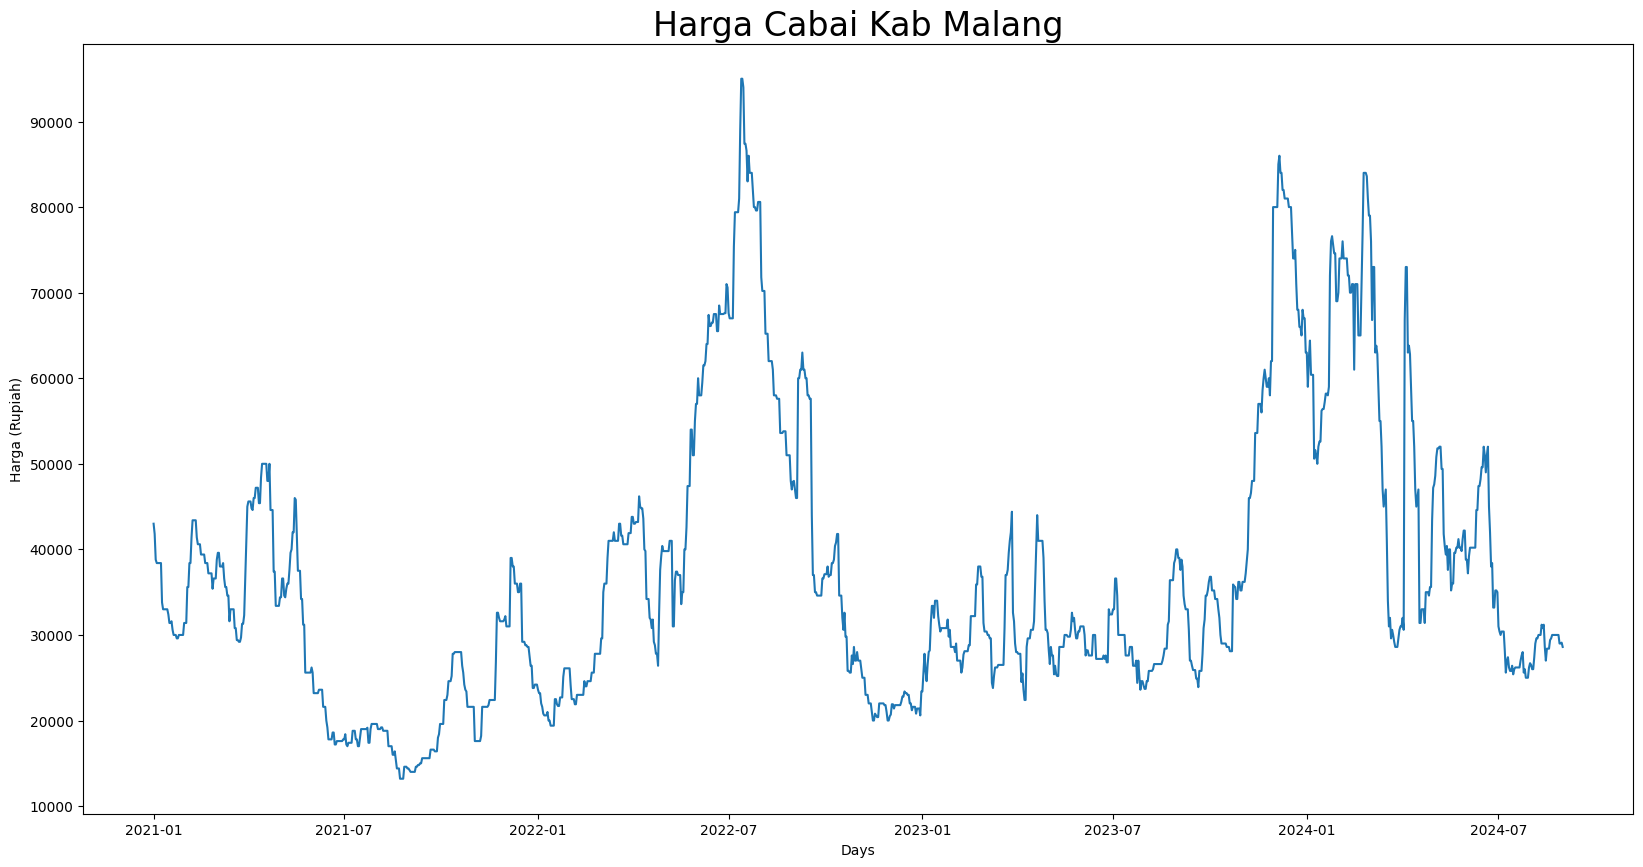

In [ ]:
# Visualize the 'Harga' column
plt.figure(figsize=(20,10))
plt.plot(df['harga'])
plt.title('Harga Cabai Kab Malang', fontsize=24)
plt.xlabel('Days')
plt.ylabel('Harga (Rupiah)')
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [ ]:
training_data_len = math.ceil(len(scaled_data) * 0.8)

In [ ]:
# Split into training data
train_data = scaled_data[:training_data_len]

In [ ]:
# Create x_train and y_train from the training data
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape x_train to 3D format for LSTM (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [ ]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001)


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_train, y_train), callbacks=[early_stopping])


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - loss: 0.0299 - val_loss: 0.0110
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - loss: 0.0119 - val_loss: 0.0077
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0062 - val_loss: 0.0045
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Create test data
test_data = scaled_data[training_data_len - 60:]
x_test = []
y_test = df['harga'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert x_test to numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
mse = np.mean((y_test - predictions) ** 2)
print(f"MSE: {mse}")

MSE: 629756211.6895729


In [ ]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 25094.94394673104


In [ ]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE: {mape}%")

MAPE: 46.54364338852389%


In [ ]:
# Plot the training and validation data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-39-4c101f1a0ece>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


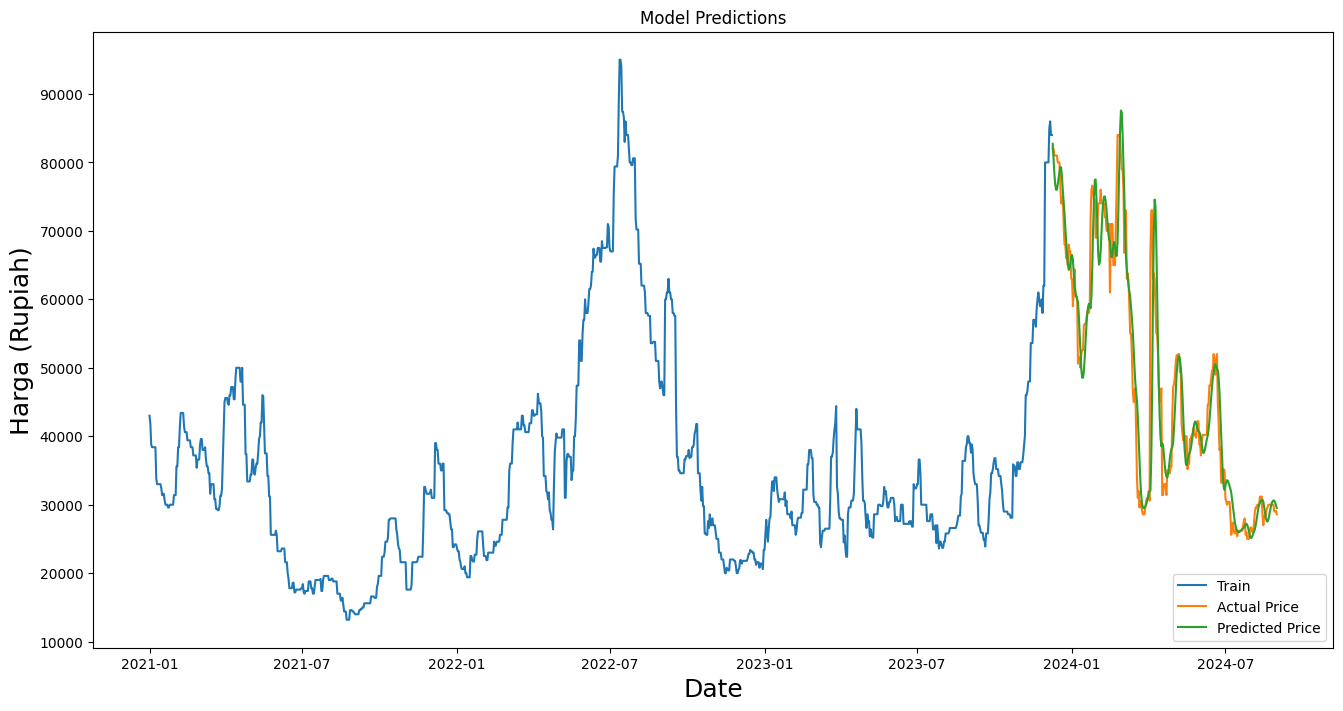

In [ ]:
# Visualize the model predictions
plt.figure(figsize=(16,8))
plt.title("Model Predictions")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Harga (Rupiah)', fontsize=18)
plt.plot(train['harga'], label='Train')
plt.plot(valid['harga'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.legend(['Train', 'Actual Price', 'Predicted Price'], loc='lower right')
plt.show()

In [ ]:
# Predict the next 7 days based on the last 60 days of available data
last_60_days = valid['harga'][-60:].values  # Get the last 60 actual data points from 'Harga'
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))  # Scale the data to match the model input

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Create a new input for the model, starting with the last 60 days
future_predictions = []

In [ ]:
# Predict for the next 7 days
for i in range(7):
    # Create the input data for prediction
    X_input = np.array([last_60_days_scaled[-60:]])  # Last 60 days as input for each iteration
    X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))

    # Make the prediction
    predicted_price_scaled = model.predict(X_input)

    # Inverse transform the predicted price to original scale
    predicted_price = scaler.inverse_transform(predicted_price_scaled)

    # Append the predicted price to the future predictions list
    future_predictions.append(predicted_price[0][0])

    # Update the scaled input data by appending the predicted price
    last_60_days_scaled = np.append(last_60_days_scaled, predicted_price_scaled)[1:]  # Slide window by removing the oldest day


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
# Create a DataFrame for the future predicted prices
future_dates = pd.date_range(start=df.index[-1], periods=8, freq='D')[1:]  # Generate the next 7 dates
future_df = pd.DataFrame({'Predicted Price': future_predictions}, index=future_dates)

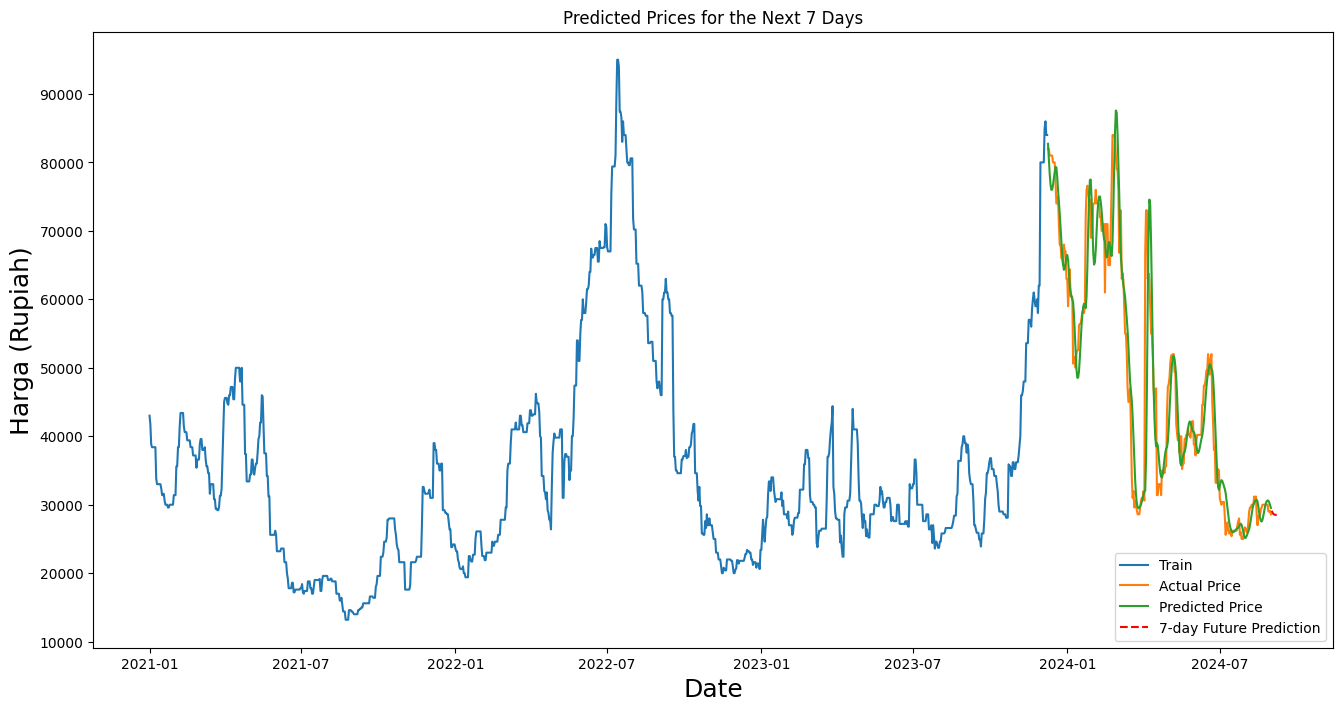

In [ ]:
# Visualization
plt.figure(figsize=(16,8))
plt.title("Predicted Prices for the Next 7 Days")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Harga (Rupiah)', fontsize=18)
plt.plot(train['harga'], label='Train')
plt.plot(valid['harga'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.plot(future_df['Predicted Price'], label='7-day Future Prediction', linestyle='--', color='red')
plt.legend(['Train', 'Actual Price', 'Predicted Price', '7-day Future Prediction'], loc='lower right')
plt.show()

In [ ]:
# Show the future predicted prices
print(future_df)

            Predicted Price
2024-09-01     29110.111328
2024-09-02     28816.355469
2024-09-03     28642.101562
2024-09-04     28554.808594
2024-09-05     28522.724609
2024-09-06     28524.591797
2024-09-07     28548.585938
